In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
df=pd.read_csv(r'E:\Sem 3\assignments\DA Lab\datasets\AirPassengers.csv',index_col='Month')

df

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [15]:
from sklearn.preprocessing import MinMaxScaler
train=df[:132]
test=df[132:]
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [16]:
n_input=12
n_features=1

In [17]:
train_generator=TimeseriesGenerator(scaled_train,
                                     scaled_train,
                                      n_input,
                                      batch_size=1)

In [18]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(10,activation='relu'))
model.add(Dense(1))

In [19]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 12, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 73,451
Trainable params: 73,451
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(train_generator,epochs=20)

Epoch 1/20
120/120 [==============================] - 12s 20ms/step - loss: 0.0335
Epoch 2/20
120/120 [==============================] - 2s 20ms/step - loss: 0.0167
Epoch 3/20
120/120 [==============================] - 2s 21ms/step - loss: 0.0143
Epoch 4/20
120/120 [==============================] - 2s 20ms/step - loss: 0.0113
Epoch 5/20
120/120 [==============================] - 2s 19ms/step - loss: 0.0115
Epoch 6/20
120/120 [==============================] - 2s 19ms/step - loss: 0.0099
Epoch 7/20
120/120 [==============================] - 2s 19ms/step - loss: 0.0106
Epoch 8/20
120/120 [==============================] - 2s 19ms/step - loss: 0.0091
Epoch 9/20
120/120 [==============================] - 2s 19ms/step - loss: 0.0107
Epoch 10/20
120/120 [==============================] - 2s 19ms/step - loss: 0.0083
Epoch 11/20
120/120 [==============================] - 2s 19ms/step - loss: 0.0078
Epoch 12/20
120/120 [==============================] - 2s 19ms/step - loss: 0.0065
Epoch 13/20


In [23]:
test_predictions = []
#Select last n_input values from the train data
first_eval_batch = scaled_train[-n_input:]
#reshape the data into LSTM required (#batch,#timesteps,#features)
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in range(len(test)):
# get prediction, grab the exact number using the [0]
  pred = model.predict(current_batch)[0]
# Add this prediction to the list
  test_predictions.append(pred)
# The most critical part, update the (#batch,#timesteps,#features
# using np.append(
# current_batch[:        ,1:   ,:] ---------> read this as
# current_batch[no_change,1:end,no_change]
# (Do note the second part has the timesteps)
# [[pred]] need the double brackets as current_batch is a 3D array
# axis=1, remember we need to add to the second part i.e. 1st axis
  current_batch = np.append(current_batch[:,1:,:],[[pred]],axis=1)

1/1 [==============================] - 0s 47ms/step


In [24]:
test_predictions

[array([0.63880944], dtype=float32),
 array([0.67939085], dtype=float32),
 array([0.74664664], dtype=float32),
 array([0.7642699], dtype=float32),
 array([0.8465792], dtype=float32),
 array([0.9671552], dtype=float32),
 array([1.0413897], dtype=float32),
 array([0.964326], dtype=float32),
 array([0.8053211], dtype=float32),
 array([0.705884], dtype=float32),
 array([0.6991794], dtype=float32),
 array([0.74422014], dtype=float32)]

In [25]:
actual_predictions = scaler.inverse_transform(test_predictions)
actual_predictions

array([[394.65829635],
       [413.1228357 ],
       [443.72422242],
       [451.74279922],
       [489.1935333 ],
       [544.05562425],
       [577.83231521],
       [542.76834095],
       [470.42109931],
       [425.17721081],
       [422.12663198],
       [442.62016261]])

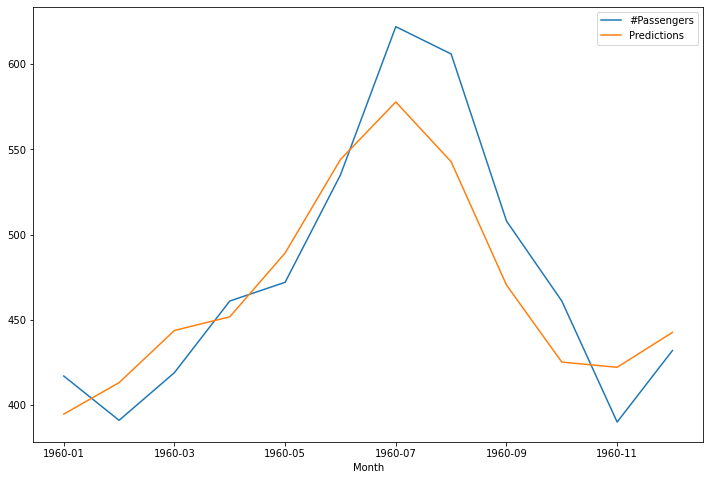

In [26]:
test['Predictions'] = actual_predictions
test.plot(figsize=(12,8));